# Problem Statement

### Business Use Case

The airline has been struggling in 2017 and hired you as a Senior Specialist to review and interpret its revenue and sales numbers. The management seeks to understand recent development and requested for:

### Data Science Problem Statement

• A summary of operational highlights in 2017 and an overview of your understanding of the network
• A summary of distribution channels and customer segments as well as a comment on its P2P / transfer ratio development
• A revenue performance analysis including yield comparison at route level and a summary of over- and underperforming routes
• A summary of agent performance across the network and a recommendation as to which group of agents to expand the partnership with and which partnerships to discontinue. [Note agent names have been anonymized, when referring to a specific agent use the ID]


### Evaluation Metric
Will be using [Flights Operated] for evaluation of operational highlights in 2017
Will be using [Departure Port] for evaluation of distribution channels and customer segments in 2017
Will be using [Revenue (USD)] for evaluation of revenue performance in 2017 for over- and underperforming routes
Will be using [Total Revenue] for evaluation of agent performance in 2017 for agents to expand the partnership with and which partnerships to discontinue


### Objective of this template notebook

The main objective of this template is to take you through the entire working pipeline that you may follow during a NCB Airline Data Analysis.

# Understanding the dataset

**Data Set Information**

The data is related to customer buying the air tickets of a NCB Airline.

### Data Description: Understanding the Data

#### - Route Performance - Operations
Flights Operated - Number of flights operated
Departure OTP - Departure on-time performance measured at 15 minutes
Arrival OTP - Arrival on-time performance measured at 15 minutes
Average Departure Delay	Average departure delay time
Pax - Economy	Number of passengers flown
Seats - Economy	Number of seats available
RPK	- Number of revenue passenger kilometres
ASK	- Number of available seat kilometres

#### - Route Performance - Revenue
Route	Sector flown
Month	Monthly Average
Pax	Passengers flown
RPK	Revenue Passenger Kilometres
Revenue - P2P	Revenue generated from P2P passengers
Revenue - Transfer 	Revenue generated from Transfer passengers
Revenue (USD)	Total revenue

#### - Audience Distribution
Website:	Bookings completed via the Website
OTA: 	Online Travel Agents
Non-OTA:	Traditional Travel Agents
Others:	All other distribution channels

#### - Customer Segmentation
Business	Typically high-yielding traffic with a small amount of people  travelling frequently, asking for high-frequency
Leisure	Travel for leisure purposes only
Visiting Friends & Family	Travel to visit friends / family
Labourer	Labour traffic - typically travels infrequently on a company-paid ticket
Religious	Travel for spiritual purposes

#### - Passenger Type
Route	Sector flown
Month	Monthly Average
Point-to-Point	Share of guests terminating at arrival port
Transfer	Share of guests transferring in AAN

#### - Agents
Agent Location	Assume agents only sell in their own territory
Agent ID	Anonymised ID
Tickets Sold	Total sales in 2017
Total Revenue	Total revenue generated in 2017
Commission Scheme	Commission payable to agency per sale
Market Share	Market share of agency

#### - Distances
Distance = Great circle distance in km between two ports


### Importing the Important Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use('fivethirtyeight')
import warnings
warnings.filterwarnings('ignore')
sns.set()
import plotly.express as px

### Importing the Dataset

In [2]:
import os
os.chdir('C:/Users/DELL/OneDrive/Data Sets')
os.listdir()

['.ipynb_checkpoints',
 'Area under different Crops.csv',
 'Bank Personal Loan Modelling Prediction.ipynb',
 'Bank_Personal_Loan_Modelling.xlsx',
 'Cereals & Millets Area, Production & Yield.csv',
 'Covid-19 Visualization - Countries Aggregated.ipynb',
 'creditcard.csv',
 'creditcard.csv.zip',
 'enigma-us.gov_.census.eits_.ressales-e7513e56d76050c05caf638306055c98_1.csv',
 'Enterprise Analytics Case Study Excel Report.xlsx',
 'Exploring Survival on the Titanic.ipynb',
 'IMUS Dales Data 2.ipynb',
 'IMUS Data Analysis by Sales.ipynb',
 'IMUS Sales Data Analysis - Power BI.pbix',
 'IMUS Sales Data.xlsx',
 'imus.xlsx',
 'List of Factories in Telangana.csv',
 'List of Factories in Telangana_0.csv',
 'multiple-linear-regression-completed.ipynb',
 'NCB Airline Analysis.ipynb',
 'NDHUB.AirportRunways.csv',
 'Pandas Continue ... (1).ipynb',
 'Super Store Data Analysis.ipynb',
 'Super Store Data.xlsx',
 'Telangana Cereals & Millets Area-Production-Yield 2016-2017 Data .ipynb',
 'titanic 1.xls',


In [3]:
df = pd.read_excel('Enterprise Analytics Case Study Excel Report.xlsx')
df.head()

,Route,Month,Flights Operated,Departure OTP,Arrival OTP,Average Departure Delay,Pax - Economy,Seats - Economy,RPK,ASK
0,RUH-AAN,2017-01-01,31,0.741935,0.677419,00:13:40.645000,4922,5394,4454410,4881570
1,RUH-AAN,2017-02-01,28,0.892857,0.750000,00:03:08.571000,4231,4872,3829055,4409160
2,RUH-AAN,2017-03-01,31,0.967742,0.903226,00:06:40.645000,4888,5394,4423640,4881570
3,RUH-AAN,2017-04-01,30,1.000000,0.900000,00:00:04,4800,5220,4344000,4724100
4,RUH-AAN,2017-05-01,31,1.000000,0.967742,00:00:32.903000,4479,5394,4053495,4881570


In [31]:
df.describe()

,Flights Operated,Departure OTP,Arrival OTP,Pax - Economy,Seats - Economy,RPK,ASK
count,460.000000,460.000000,460.000000,460.000000,460.000000,4.600000e+02,4.600000e+02
mean,26.558696,0.848643,0.893244,3642.226087,4621.213043,6.811688e+06,8.657788e+06
std,6.993526,0.215687,0.152319,1277.776003,1216.873467,3.083579e+06,3.259125e+06
min,7.000000,0.000000,0.033333,585.000000,1218.000000,1.257556e+06,3.088848e+06
25%,26.750000,0.833333,0.857143,2630.250000,4654.500000,4.030582e+06,5.249232e+06
50%,30.000000,0.933333,0.935484,4015.500000,5220.000000,6.681744e+06,9.121689e+06
75%,31.000000,0.967742,1.000000,4679.250000,5394.000000,9.278187e+06,1.119168e+07
max,31.000000,1.000000,1.000000,5363.000000,5394.000000,1.367313e+07,1.493442e+07


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 460 entries, 0 to 459
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Route                    460 non-null    object        
 1   Month                    460 non-null    datetime64[ns]
 2   Flights Operated         460 non-null    int64         
 3   Departure OTP            460 non-null    float64       
 4   Arrival OTP              460 non-null    float64       
 5   Average Departure Delay  460 non-null    object        
 6   Pax - Economy            460 non-null    int64         
 7   Seats - Economy          460 non-null    int64         
 8   RPK                      460 non-null    int64         
 9   ASK                      460 non-null    int64         
dtypes: datetime64[ns](1), float64(2), int64(5), object(2)
memory usage: 36.1+ KB


In [5]:
df.shape

(460, 10)

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 460 entries, 0 to 459
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Route                    460 non-null    object        
 1   Month                    460 non-null    datetime64[ns]
 2   Flights Operated         460 non-null    int64         
 3   Departure OTP            460 non-null    float64       
 4   Arrival OTP              460 non-null    float64       
 5   Average Departure Delay  460 non-null    object        
 6   Pax - Economy            460 non-null    int64         
 7   Seats - Economy          460 non-null    int64         
 8   RPK                      460 non-null    int64         
 9   ASK                      460 non-null    int64         
dtypes: datetime64[ns](1), float64(2), int64(5), object(2)
memory usage: 36.1+ KB


In [4]:
df.isnull().sum()

Route                      0
Month                      0
Flights Operated           0
Departure OTP              0
Arrival OTP                0
Average Departure Delay    0
Pax - Economy              0
Seats - Economy            0
RPK                        0
ASK                        0
dtype: int64

In [5]:
df.nunique()

Route                       40
Month                       12
Flights Operated            23
Departure OTP              100
Arrival OTP                 68
Average Departure Delay    391
Pax - Economy              424
Seats - Economy             23
RPK                        458
ASK                         84
dtype: int64

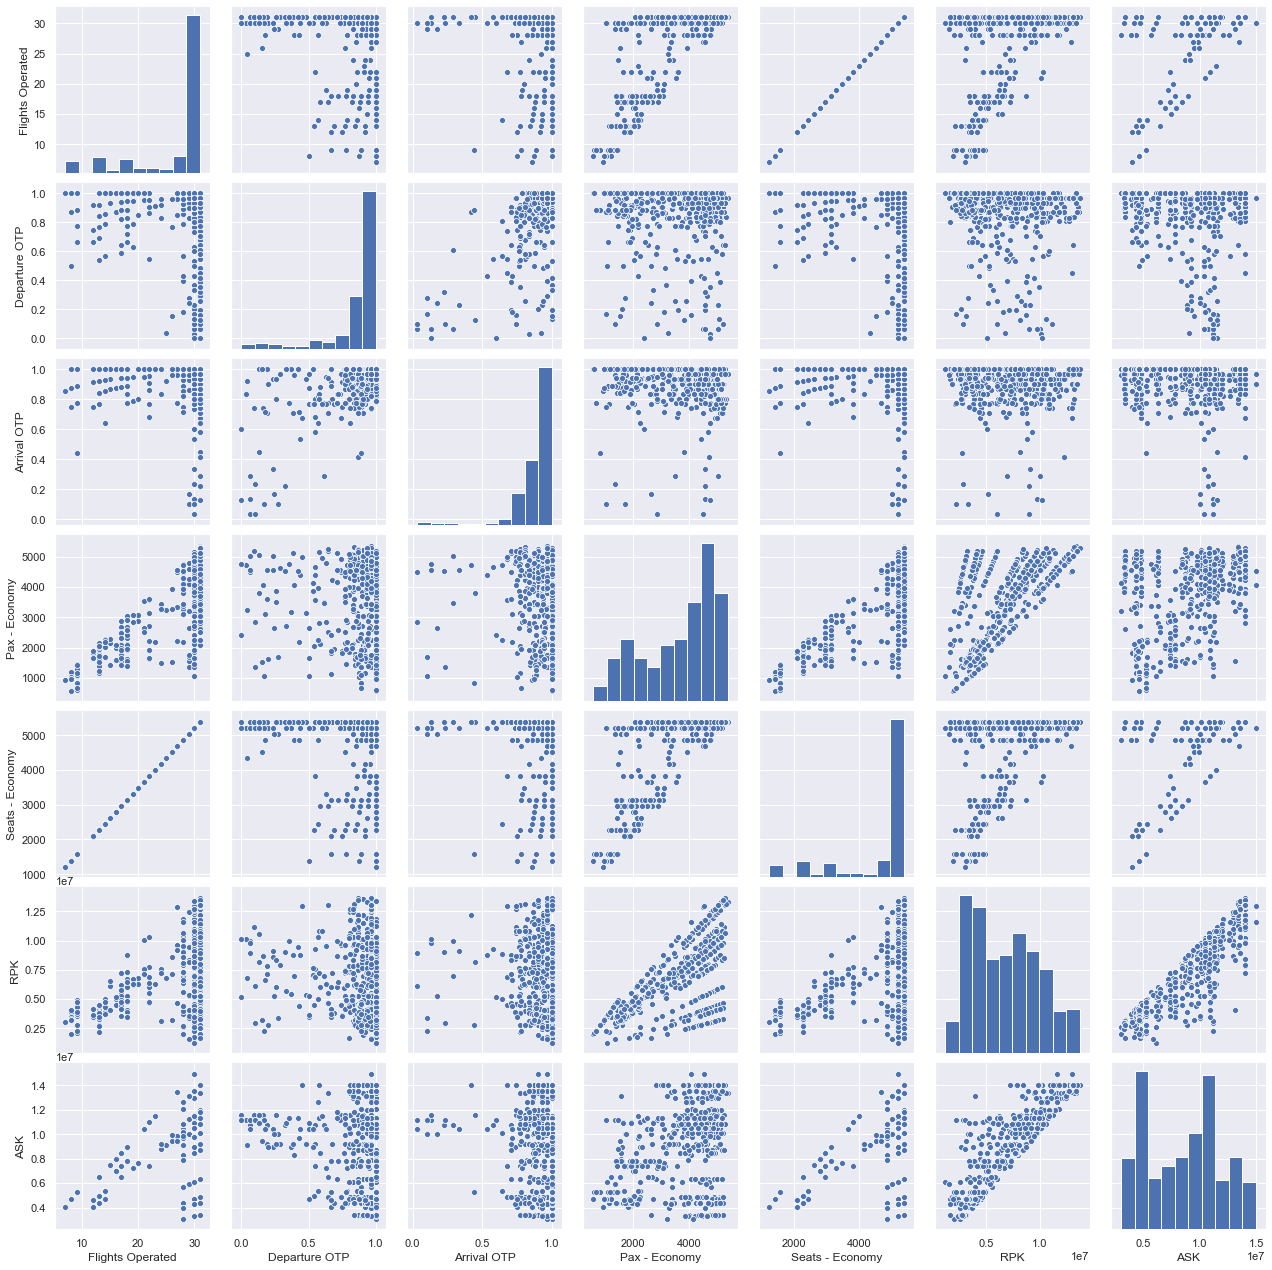

In [20]:
sns.pairplot(df.iloc[:,1:])

In [7]:
df.nunique()

Route                       40
Month                       12
Flights Operated            23
Departure OTP              100
Arrival OTP                 68
Average Departure Delay    391
Pax - Economy              424
Seats - Economy             23
RPK                        458
ASK                         84
dtype: int64

In [26]:
# Checking the Categorical Columns from the Data

categorical_variables=[col for col in df.columns if df[col].nunique()<=40]
print(categorical_variables)

['Route', 'Month', 'Flights Operated', 'Seats - Economy']


In [27]:
# Checking for the Continous columns from the data
continuous_variables=[col for col in df.columns if df[col].nunique()>40]
print(continuous_variables)

['Departure OTP', 'Arrival OTP', 'Average Departure Delay', 'Pax - Economy', 'RPK', 'ASK']


### Data Visualization of Categorical Columns

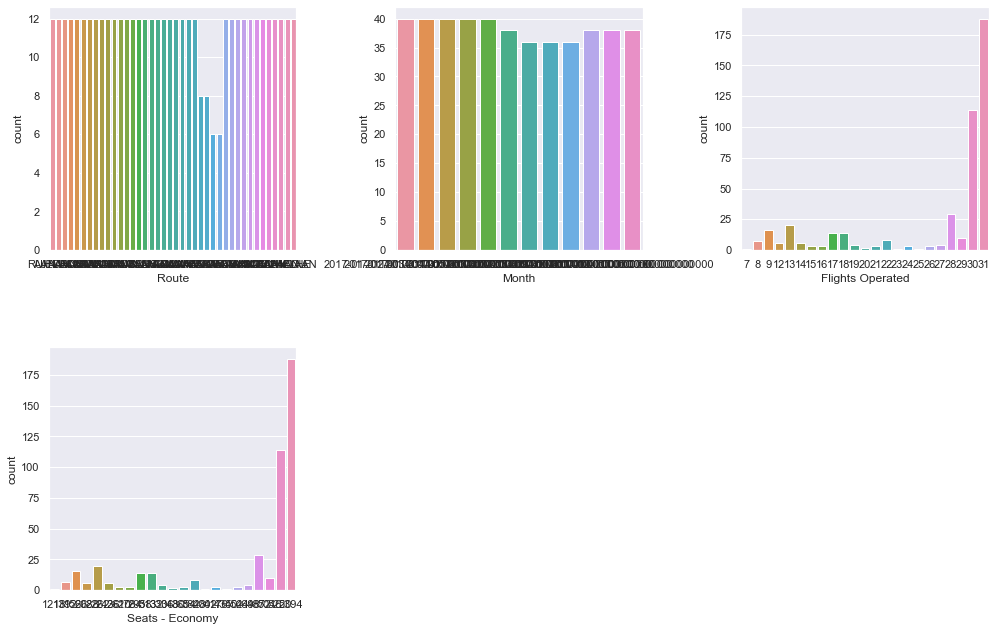

In [28]:
fig=plt.figure(figsize=(15,10))
fig.subplots_adjust(wspace=0.4,hspace=0.4)
for i,col in enumerate(categorical_variables):
    ax=fig.add_subplot(2,3,i+1)
    sns.countplot(df[col])

##### 1. Most of the Routes doesn't Operates Flights more than 10 flights
##### 2. More number of Flights Operated for are 30 and 31
##### 3. Lowest number of Flights Operated are 

In [24]:
# Finding the correlation between routes and flight operated
df[['Route', 'Month', 'Flights Operated', 'Departure OTP', 'Arrival OTP',
       'Average Departure Delay', 'Pax - Economy', 'Seats - Economy', 'RPK',
       'ASK']].corr()

,Flights Operated,Departure OTP,Arrival OTP,Pax - Economy,Seats - Economy,RPK,ASK
Flights Operated,1.000000,-0.105242,-0.114042,0.796279,1.000000,0.410863,0.430378
Departure OTP,-0.105242,1.000000,0.624125,0.005098,-0.105242,-0.073922,-0.174717
Arrival OTP,-0.114042,0.624125,1.000000,-0.055171,-0.114042,-0.089464,-0.149807
Pax - Economy,0.796279,0.005098,-0.055171,1.000000,0.796279,0.616875,0.356882
Seats - Economy,1.000000,-0.105242,-0.114042,0.796279,1.000000,0.410863,0.430378
RPK,0.410863,-0.073922,-0.089464,0.616875,0.410863,1.000000,0.874121
ASK,0.430378,-0.174717,-0.149807,0.356882,0.430378,0.874121,1.000000


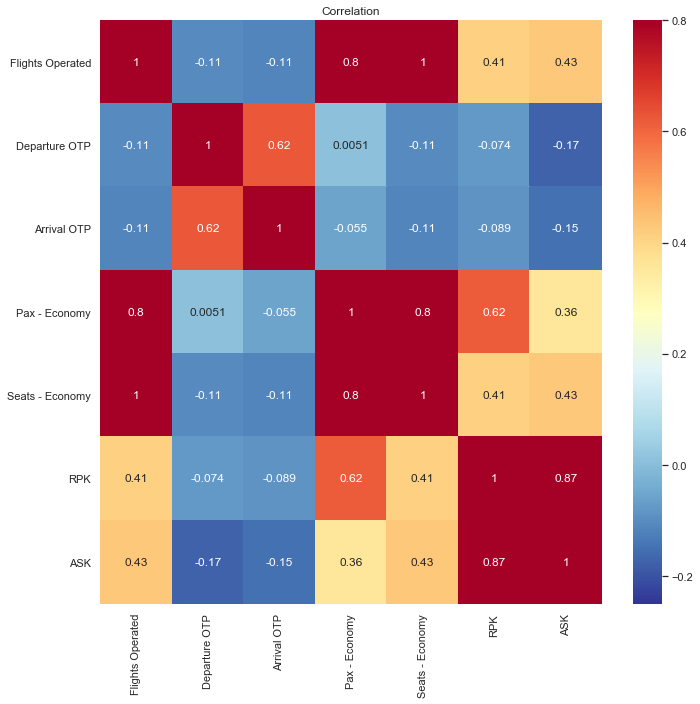

In [30]:
corr=df.corr()
plt.figure(figsize=(10,10))
plt.title('Correlation')
sns.heatmap(corr,cmap = plt.cm.RdYlBu_r, vmin = -0.25, annot = True, vmax = 0.8)

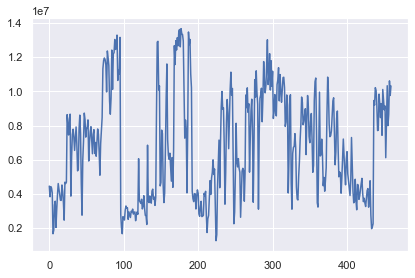

In [32]:
# Count the order ID
df['RPK'].plot()

In [33]:
# Creating a subset
df.groupby('Route')['Flights Operated'].sum()

Route
AAN-AMM    355
AAN-BEY    181
AAN-BOM    365
AAN-CAI    365
AAN-CCJ    364
AAN-CCU    104
AAN-DEL    239
AAN-DMM    365
AAN-GOI    364
AAN-HYD    209
AAN-ISB    363
AAN-JED    365
AAN-JIB    164
AAN-KHI    363
AAN-KRT    243
AAN-LHE    362
AAN-MED    365
AAN-RUH    365
AAN-SLL    365
AAN-TRV    244
AMM-AAN    355
BEY-AAN    180
BOM-AAN    365
CAI-AAN    364
CCJ-AAN    363
CCU-AAN    103
DEL-AAN    239
DMM-AAN    365
GOI-AAN    363
HYD-AAN    209
ISB-AAN    361
JED-AAN    365
JIB-AAN    164
KHI-AAN    363
KRT-AAN    243
LHE-AAN    365
MED-AAN    365
RUH-AAN    365
SLL-AAN    365
TRV-AAN    245
Name: Flights Operated, dtype: int64

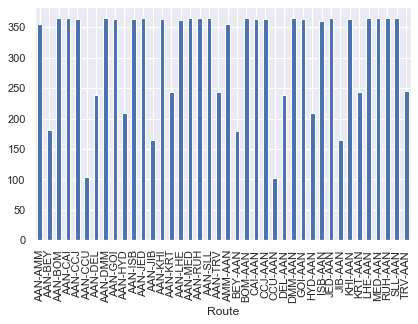

In [42]:
df.groupby('Route')['Flights Operated'].sum().plot(kind='bar')

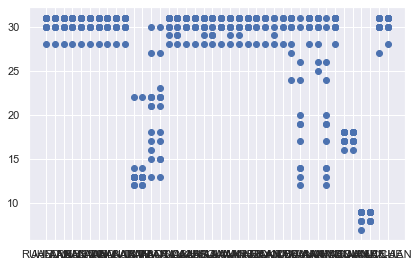

In [35]:
# Scatter plot for distribution of crop
x = df['Route']
y = df['Flights Operated']
plt.scatter(x,y)
plt.show()